In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading the Data as a pandas dataframe

In [79]:
df = pd.read_csv('votes.data',header=None,index_col=False)

In [80]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [81]:
df = df[[0,3]]
df.columns = ['party','budget']
df.head()

,party,budget
0,republican,n
1,republican,n
2,democrat,y
3,democrat,y
4,democrat,y


In [82]:
df = df[df != '?']
df = df.dropna()

In [83]:
df.shape

(424, 2)

In [84]:
matrix = df.groupby('party').budget.value_counts()
matrix

party       budget
democrat    y         231
            n          29
republican  n         142
            y          22
Name: budget, dtype: int64

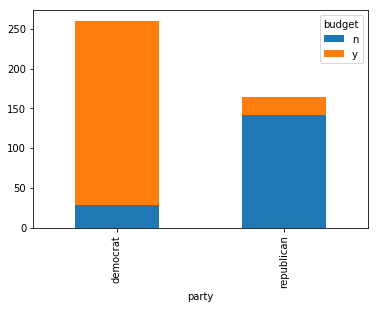

In [86]:
matrix.unstack(level=1).plot(kind='bar', stacked=True)

Finding the needed probabilities

In [60]:
p_dem = (df['party'] == 'democrat').sum()/df['party'].count()
p_dem

0.6132075471698113

In [61]:
p_rep = 1 - p_dem
p_rep

0.3867924528301887

In [63]:
p_ybudget = (df['budget'] == 'y').sum()/df['budget'].count()
p_ybudget

0.5966981132075472

In [64]:
p_nbudget = 1 - p_ybudget
p_nbudget

0.4033018867924528

In [68]:
p_ybudget_rep = ((df['party']=='republican') & (df['budget'] == 'y')).sum() / (df['party']=='republican').sum()
p_ybudget_rep

0.13414634146341464

p(republican|ybudget) = p(ybudget|republican) * p(republican) / p(ybudget) - Using Bayes Theoram

In [73]:
p_rep_ybudget = p_ybudget_rep * p_rep / p_ybudget
p_rep_ybudget

0.08695652173913045

From DataSet

In [75]:
p_rep_ybudget_data = ((df['party']=='republican') & (df['budget'] == 'y')).sum()/ (df['budget'] == 'y').sum()
p_rep_ybudget_data

0.08695652173913043